# Hierarchical Clustering Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

## Get the dataset to cluster
For demonstration purposes we will again generate random 2D points.

In [3]:
# Generate two globular clusters (25 points in each, 2 dimensions)
SEPARATION = 3  # Experiment with this value to push the clusters closer or further apart
set_1 = np.random.randn(25, 2) + np.array([6 - SEPARATION, 6 - SEPARATION])
set_2 = np.random.randn(25, 2) + np.array([6 + SEPARATION, 6 + SEPARATION])

# Stack the sets into a single dataset
data = np.vstack([set_1, set_2])

In [4]:
data

array([[ 3.49671415,  2.8617357 ],
       [ 3.64768854,  4.52302986],
       [ 2.76584663,  2.76586304],
       [ 4.57921282,  3.76743473],
       [ 2.53052561,  3.54256004],
       [ 2.53658231,  2.53427025],
       [ 3.24196227,  1.08671976],
       [ 1.27508217,  2.43771247],
       [ 1.98716888,  3.31424733],
       [ 2.09197592,  1.5876963 ],
       [ 4.46564877,  2.7742237 ],
       [ 3.0675282 ,  1.57525181],
       [ 2.45561728,  3.11092259],
       [ 1.84900642,  3.37569802],
       [ 2.39936131,  2.70830625],
       [ 2.39829339,  4.85227818],
       [ 2.98650278,  1.94228907],
       [ 3.82254491,  1.77915635],
       [ 3.2088636 ,  1.04032988],
       [ 1.67181395,  3.19686124],
       [ 3.73846658,  3.17136828],
       [ 2.88435172,  2.6988963 ],
       [ 1.52147801,  2.28015579],
       [ 2.53936123,  4.05712223],
       [ 3.34361829,  1.23695984],
       [ 9.32408397,  8.61491772],
       [ 8.323078  ,  9.61167629],
       [10.03099952,  9.93128012],
       [ 8.16078248,

The dataset produced in the cell above contains two globular clusters. You can experiment with adding an additional linear cluster by uncommenting the code in the cell below.

In [5]:
# # Generate an additional linear cluster
# x = np.linspace(0, 12, 25)  # Evenly spaced X values from 0 to 12 for 25 points
# y = 12 - x  # Linear Y values to create a line from (0,12) to (12,0)
# # Combine X and Y to form the linear cluster
# linear_cluster = np.column_stack([x, y])
# data = np.vstack([data, linear_cluster])

### Visualize our data prior to clustering

Text(0.5, 1.0, 'Data Before Clustering')

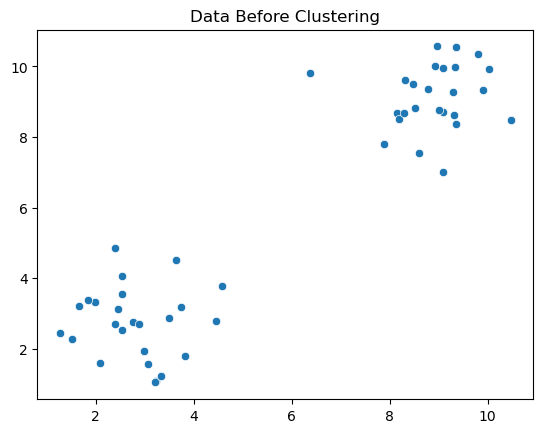

In [6]:
sns.scatterplot(x=data[:, 0],  # data[:, 0] selects all the x-coordinates in data
                y=data[:, 1])  # data[:, 1] selects all the y-coordinates in data
plt.title('Data Before Clustering')

## Perform the hierarchical clustering
Here we generate a linkage matrix using the linkage() function that we imported from SciPy above. Just as X often represents the input data to a machine learning algorithm (in this case the 2D coordinates of each data point) and y is used for the output (the actual or predicted values), Z is the variable name conventionally used to represent the linkage matrix.

In this example, clusters are formed by linking points to nearby points or previously generated clusters. This is known as agglomerative clustering. It is also possible to use divisive clustering where we start with the entire dataset and break it apart a step at a time.

With agglomerative clustering there are different ways to link the data points/previously generated clusters. Ward linkage is often the default choice (as indicated by method='ward' in the code below), but you can experiment with the other approaches by uncommenting the alternatives. You can read more about these methods in the documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

Each row of Z has the format [idx1, idx2, dist, sample_count], where:
 - idx1 and idx2 are the indexes of either the original observations (the data points) or previously formed clusters.
 - dist is the distance between these clusters.
 - sample_count is the number of original observations in the newly formed cluster.

In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
# Using the linkage function to perform hierarchical clustering
# 'ward' method minimizes the variance of clusters being merged
# Z = linkage(data, method=     )
# Z = linkage(data, method='average')
# Z = linkage(data, method='median')
# Z = linkage(data, method='complete')  # farthest point between clusters
# Z = linkage(data, method='single')  # nearest distance between clusters
# Z = linkage(data, method='weighted')
Z = linkage(data, method='ward')
Z

array([[6.00000000e+00, 1.80000000e+01, 5.69872204e-02, 2.00000000e+00],
       [3.80000000e+01, 4.90000000e+01, 1.04226106e-01, 2.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 1.36117600e-01, 2.00000000e+00],
       [2.80000000e+01, 4.60000000e+01, 1.38399692e-01, 2.00000000e+00],
       [8.00000000e+00, 1.30000000e+01, 1.51211942e-01, 2.00000000e+00],
       [3.30000000e+01, 4.50000000e+01, 1.72649375e-01, 2.00000000e+00],
       [2.60000000e+01, 4.40000000e+01, 1.77033605e-01, 2.00000000e+00],
       [4.20000000e+01, 5.30000000e+01, 2.16146225e-01, 3.00000000e+00],
       [5.00000000e+00, 1.40000000e+01, 2.21626110e-01, 2.00000000e+00],
       [2.40000000e+01, 5.00000000e+01, 2.42355704e-01, 3.00000000e+00],
       [2.50000000e+01, 3.40000000e+01, 2.62734933e-01, 2.00000000e+00],
       [7.00000000e+00, 2.20000000e+01, 2.92463704e-01, 2.00000000e+00],
       [1.90000000e+01, 5.40000000e+01, 3.31838784e-01, 3.00000000e+00],
       [2.90000000e+01, 5.50000000e+01, 3.68238700e

### Plot the Dendrogram
A dendrogam shows how the data points have been hierarchically clustered. For example, in the diagram below we can see that (with method='ward') points 6 and 18 were very close together and have been merged into a cluster of two points. Point 24 was very close to that cluster and therefore was merged with 6 and 18 to form a cluster of three points. The dendrogram shows the whole structure.

In [9]:
from scipy.cluster.hierarchy import dendrogram

Text(0, 0.5, 'Distance')

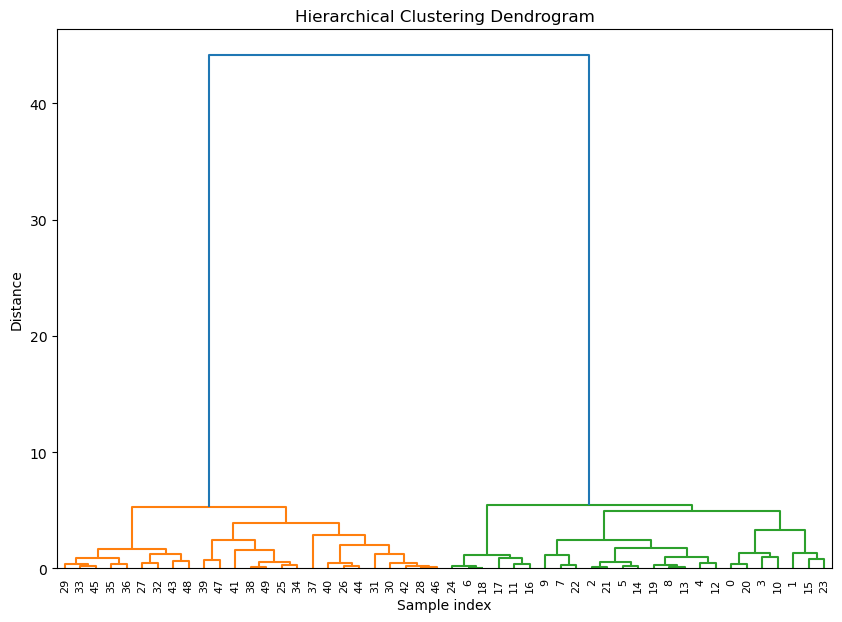

In [10]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

## Cut the Dendrogram to Create Clusters
Using the linkage matrix Z, we can use fcluster to cut the dendrogram if we want to get a desired number of clusters. We can experiment with the number of clusters to see what works well.

In [11]:
from scipy.cluster.hierarchy import fcluster

In [12]:
NUMBER_OF_CLUSTERS = 2
cluster_labels = fcluster(Z, t=NUMBER_OF_CLUSTERS, criterion='maxclust')

In [13]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

Next we'll create another scatterplot of the data but we'll use the hue argument to highlight the different clusters.

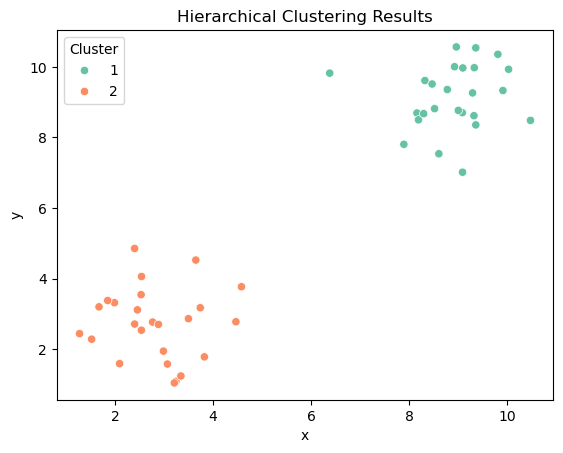

In [14]:
# Create a scatter plot
sns.scatterplot(x=data[:, 0],
                y=data[:, 1],
                hue=cluster_labels,
                palette='Set2')

plt.title("Hierarchical Clustering Results")
plt.xlabel("x")
plt.ylabel("y")

# Show legend with cluster labels
plt.legend(title='Cluster')

# Cluster the Well-Known Iris Dataset
This dataset is more often used for supervised learning - we predict species of iris based on petal length, petal width, sepal length, and sepal width. But we will use these features to cluster the data and then see if our clusters correspond to the species labels.

### Load the Dataset
The iris dataset is very well known and is available from various sources including Kaggle. For convenience we'll load it from Scikit-learn in this demo.

In [15]:
from sklearn.datasets import load_iris

In [16]:
# I originally read the data from a CSV file that I downloaded from Kaggle.
# This included the species column.
# import pandas as pd
# iris_df = pd.read_csv('./data/iris.csv')

# To simplify the example, I modified the code to load the dataset from sklearn.
# This returns a tuple of the features and the target.
iris_df, species_array = load_iris(as_frame=True, return_X_y=True)

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
species_array

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### Perform Hierarchical Clustering

In [19]:
# Using only the feature columns
# X = iris_df.drop(columns=['species'])  # if your dataset contained the species column
X = iris_df 

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
# Use the 'ward' method again for hierarchical clustering
Z = linkage(X, 'ward')

Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

### Extract and Prepare Species Labels for Dendrogram

In [21]:
# This line gets an array of species labels from my original dataset from Kaggle
#species_labels = iris_df['species'].values

# Here we create a list of species labels from the version of the data from sklearn
species = ['setosa', 'versicolor', 'virginica']
species_labels = [species[i] for i in species_array]
species_labels

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


### Display Dendrogram with Species Labels

Text(0.5, 1.0, 'Iris Hierarchical Clustering Dendrogram')

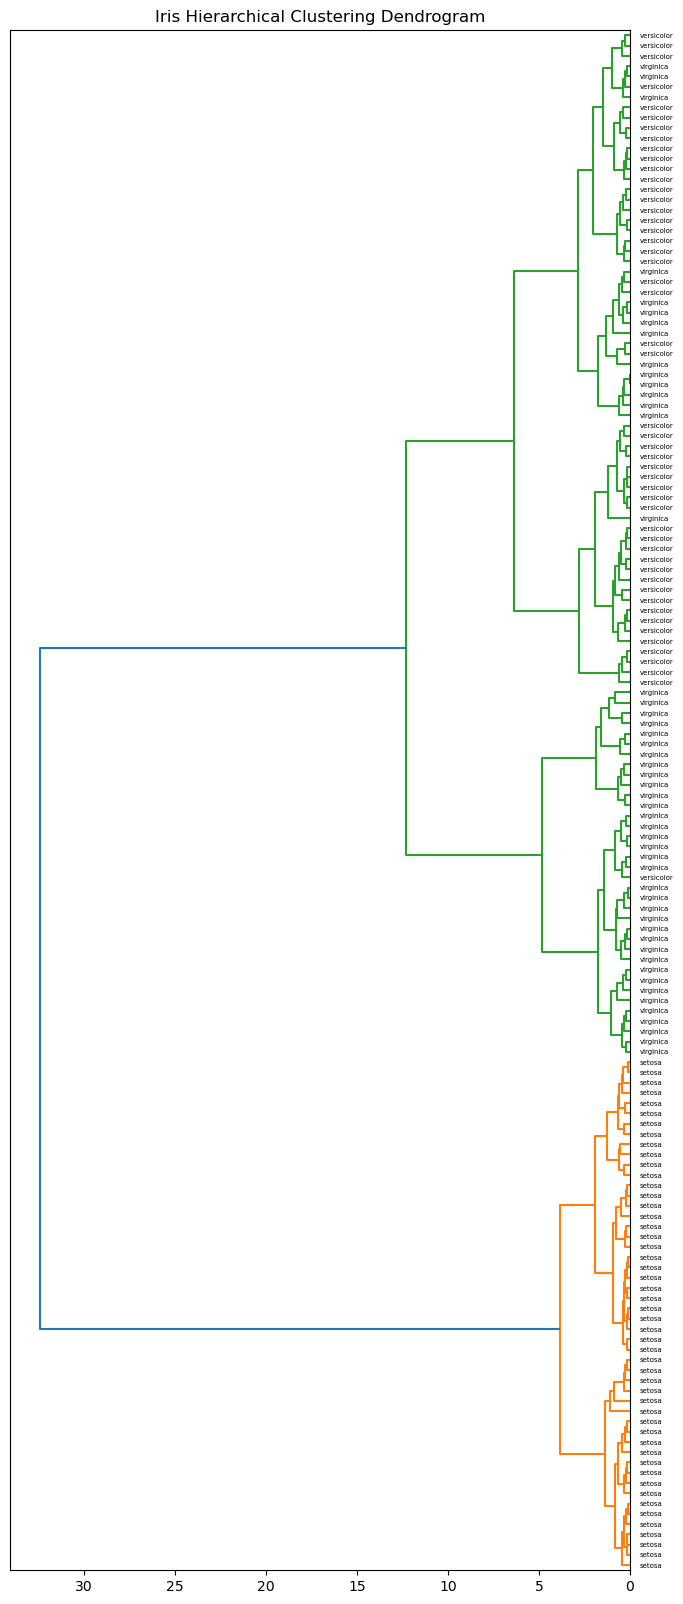

In [22]:
plt.figure(figsize=(8, 20))
dendrogram(Z,
           labels=species_labels,
           orientation='left')
plt.title("Iris Hierarchical Clustering Dendrogram")

## Try to achieve better separation of the species
Looking at the dendrogram above, iris-setosa looks well separated, but iris-virginica and iris-versicolor look a bit more mixed. We will try to achieve better separation by normalizing. The goal is to ensure that each feature contributes equally to the distance computations used in clustering. Without normalization, features with larger numerical ranges can disproportionately influence the distance calculations.

### Standardization vs. Normalization
Standardization (Z-score normalization) scales the features so they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1.

Normalization (Min-Max scaling) scales and shifts the features so that they range from 0 to 1. You can also scale them to any other specific range.
Both methods can be effective, but standardization is less affected by outliers and is generally preferred for clustering.

We will use Scikit-Learn to perform standardization and then see if that gives a better clustering.

In [23]:
from sklearn.preprocessing import StandardScaler

### Apply standardization

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Perform hierarchical clustering on the scaled data

In [26]:
Z_scaled = linkage(X_scaled, method='ward')
# Z_scaled = linkage(X_scaled, method='complete')
# Z_scaled = linkage(X_scaled, method='centroid')
# Z_scaled = linkage(X_scaled, method='average')
# Z_scaled = linkage(X_scaled, method='median')
# Z_scaled = linkage(X_scaled, method='single')
# Z_scaled = linkage(X_scaled, method='weighted')

### Plot the dendrogram

Text(0.5, 1.0, 'Iris Hierarchical Clustering Dendrogram')

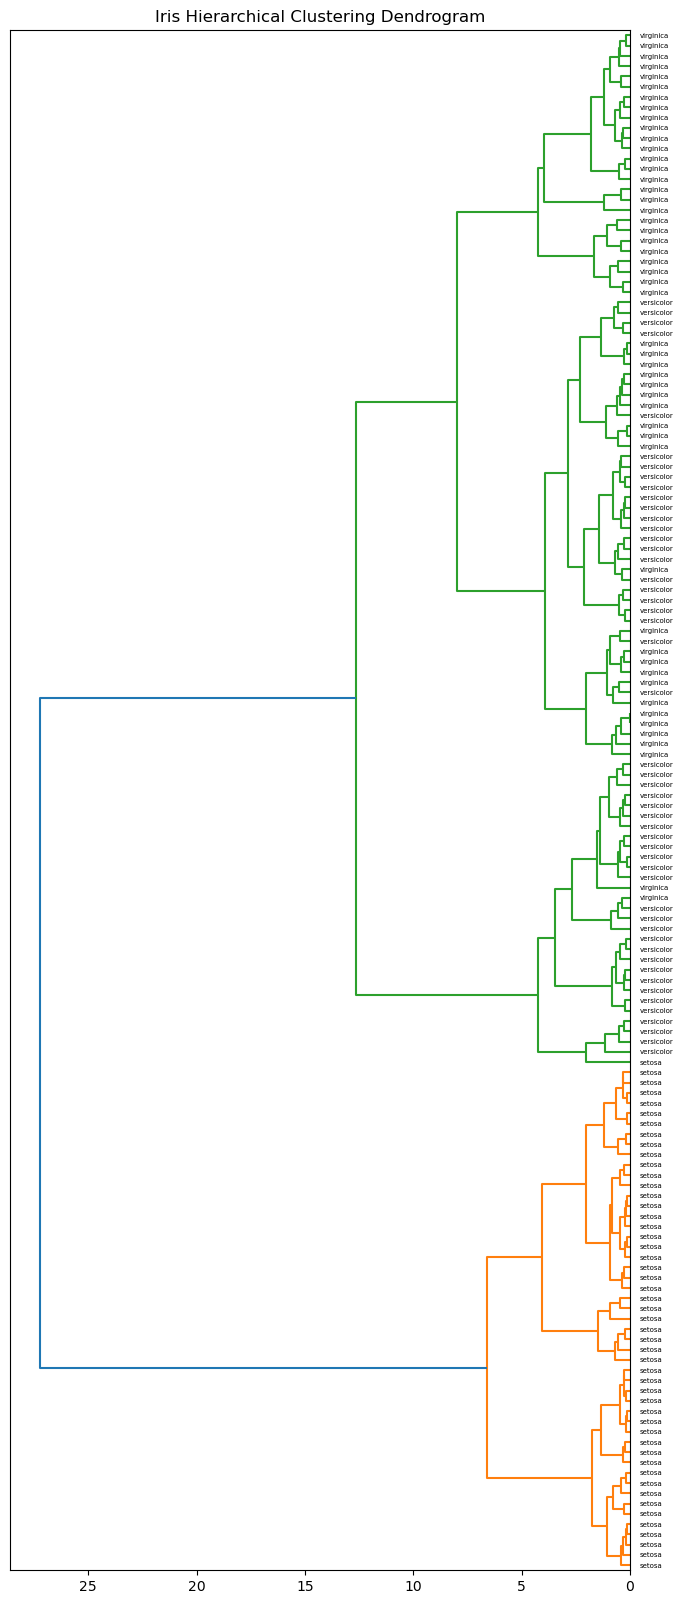

In [27]:
plt.figure(figsize=(8, 20))
dendrogram(Z_scaled,
           labels=species_labels,
           orientation='left')
plt.title("Iris Hierarchical Clustering Dendrogram")

Did we achieve a better clustering that time? It's hard to tell just by eye-balling the dendrogram, but it doesn't look better to me. We can use the adjusted rand index (ARI) to compare our clusters with the original classes.

In [28]:
from sklearn.metrics import adjusted_rand_score

Get the cluster labels for for the unscaled and scaled clusterings.

In [29]:
predicted_labels_unscaled = fcluster(Z, t=3, criterion='maxclust')
predicted_labels_scaled = fcluster(Z_scaled, t=3, criterion='maxclust')

Calculate ARI.

In [30]:
ari_unscaled = adjusted_rand_score(species_labels, predicted_labels_unscaled)
ari_scaled = adjusted_rand_score(species_labels, predicted_labels_scaled)

print("Adjusted Rand Index for the unscaled dataset:", ari_unscaled)
print("Adjusted Rand Index for the scaled dataset:", ari_scaled)

Adjusted Rand Index for the unscaled dataset: 0.7311985567707746
Adjusted Rand Index for the scaled dataset: 0.6153229932145449


Oh dear, we've made it worse!

The problem isn't that scaling the data was a bad idea. The problem now is that we're treating all of the columns equally, whereas an expert on irises would be able to tell you that the petal lengths and widths tend to be more useful than sepal lengths and widths for distinguishing between different iris species. 

### Apply feature weighting
We will now apply this domain knowledge by reducing the weight of sepal length and sepal width.

In [31]:
# Here we set the first two features (sepal length and sepal width) to be a fifth as important
# as the last two (petal length and petal width).

feature_weights = np.array([0.2, 0.2, 1., 1.])

In [32]:
# Weights based on feature importances from decision tree in classifying-irises.ipynb
# feature_weights = np.array([0.03550967, 0.03550967, 1., 0.78715117])

# Weights based on feature importances from random forest
# feature_weights = np.array([0.22165819, 0.08485548, 0.99763139, 1.])

In [33]:
X_weighted = X_scaled * feature_weights

#### Perform hierarchical clustering on the weighted data

In [34]:
Z_weighted = linkage(X_weighted, method='ward')

Text(0.5, 1.0, 'Iris Hierarchical Clustering Dendrogram (Weighted Features)')

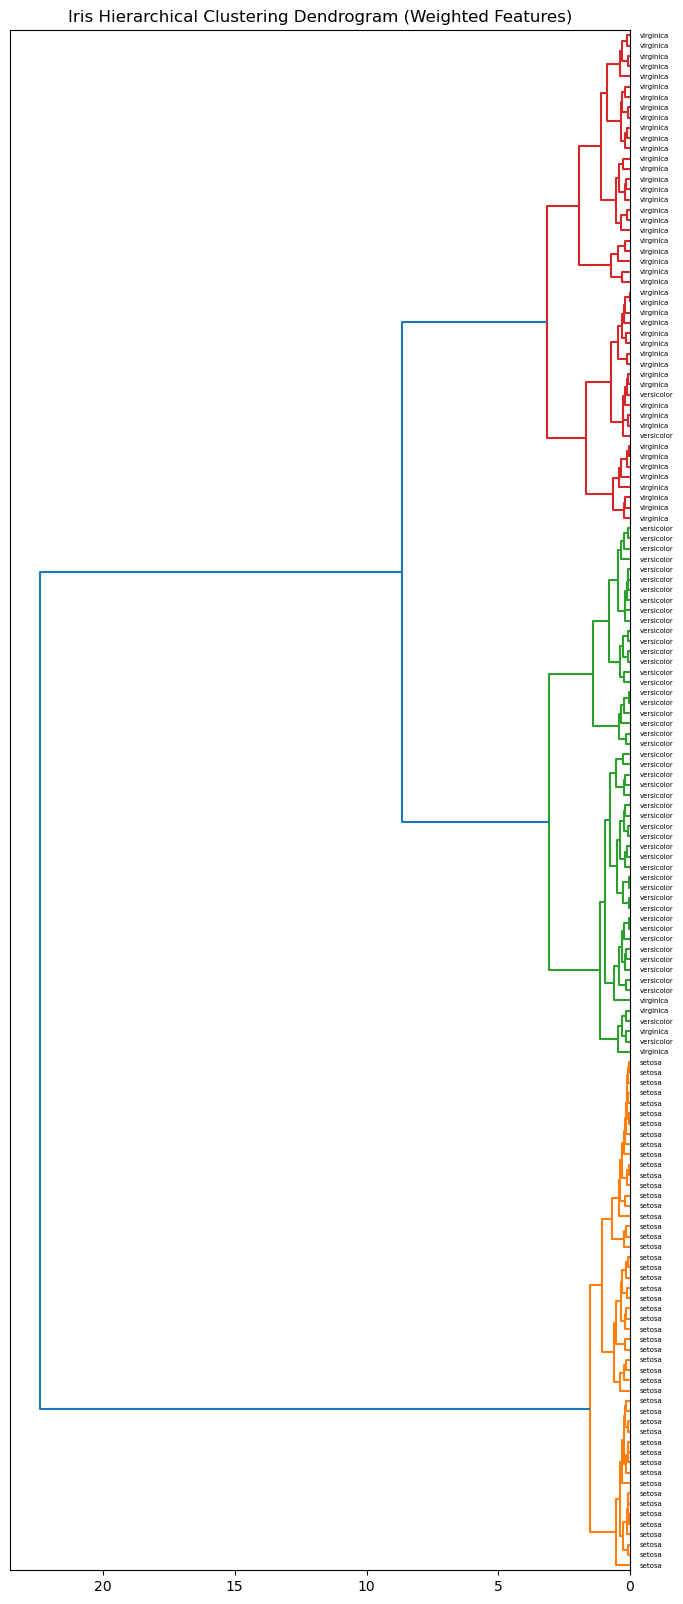

In [35]:
# Plot the dendrogram
plt.figure(figsize=(8, 20))
dendrogram(Z_weighted,
           labels=species_labels,
           color_threshold=5,
           orientation='left')
plt.title("Iris Hierarchical Clustering Dendrogram (Weighted Features)")

### Calculate and print ARI

In [36]:
predicted_labels_weighted = fcluster(Z_weighted, t=3, criterion='maxclust')

ari_weighted = adjusted_rand_score(species_labels, predicted_labels_weighted)
print("Adjusted Rand Index (Weighted):", ari_weighted)

Adjusted Rand Index (Weighted): 0.8856970310281228


We've made a big improvement now - our clusters more closely correspond with the species labels. Of course, we might not have labels in a real-world unsupervised learning situation. This example highlights the value of domain knowledge in data analysis and machine learning. Without domain knowledge, we wouldn't have known that it would be a good idea to to weight the petal features more heavily than the sepal features.

#### Colour the labels
The example below shows the same dendrogram, but this time the labels are coloured to match the colours used when constructing the dendrogram. This makes it easier to spot irises that appear to be in the wrong cluster.

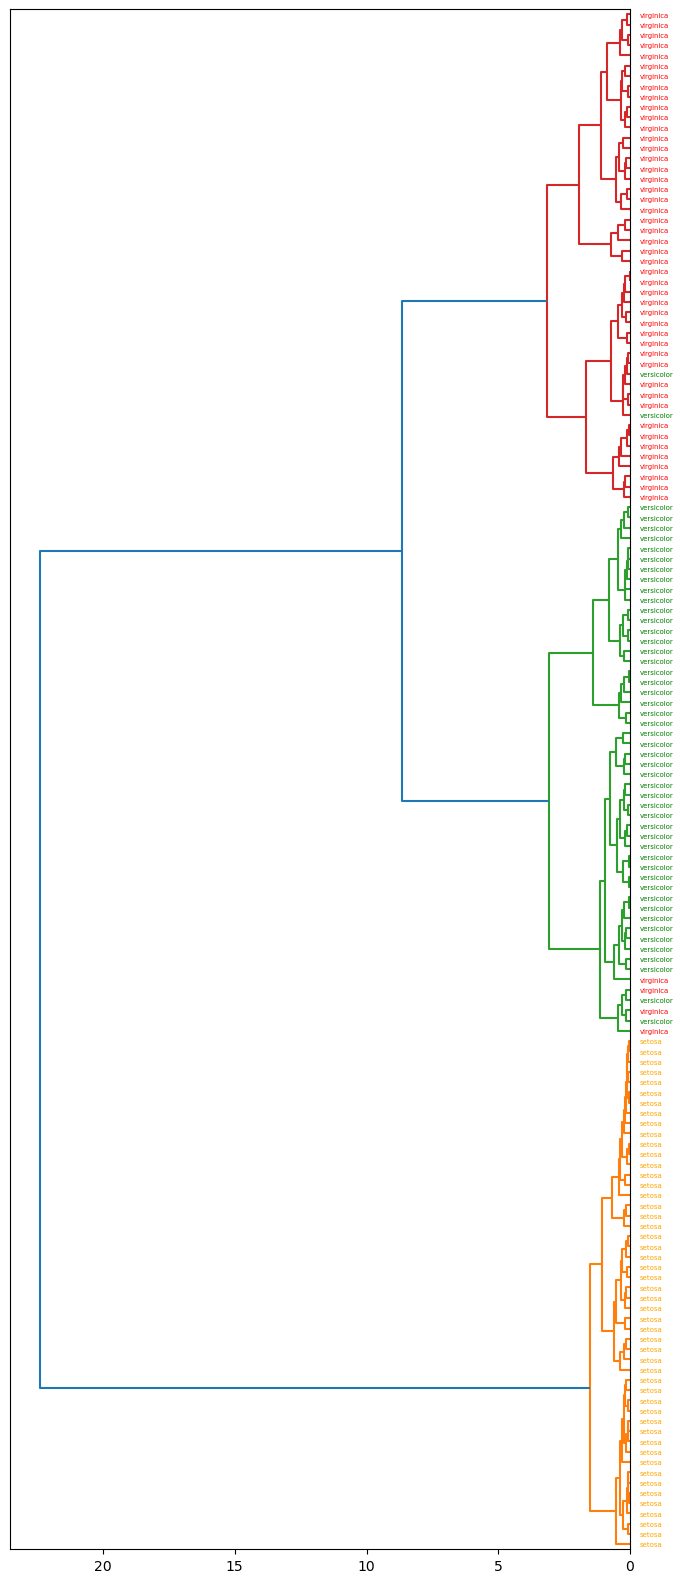

In [38]:
# Create a mapping from species name to the colour you want
species_colour_map = {
    "setosa": "orange",
    "versicolor": "green",
    "virginica": "red"
}

plt.figure(figsize=(8, 20))
dendrogram(Z_weighted,
           labels=species_labels,
           color_threshold=5,
           orientation='left')
ax = plt.gca()  # get the current axes

for text in ax.get_yticklabels():
    label = text.get_text().lower()
    text.set_color(species_colour_map.get(label))